<h3>AUGMENTATION & TRANSFER LEARNING TUTORIAL</h3>

In [27]:
# Pandas and Numpy
import scipy as sp
import numpy as np
import pandas as pd
from numpy.random import rand
pd.options.display.max_colwidth = 600

# Scikit Imports
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.model_selection import train_test_split



# Matplot Imports
import matplotlib.pyplot as plt
from matplotlib import pyplot

# pandas display data frames as tables
from IPython.display import display, HTML

import warnings
warnings.filterwarnings('ignore')

In [28]:
#keras imports
import tensorflow as tf
import keras
from keras import callbacks
from keras import optimizers
from keras.datasets import cifar10
from keras.engine import Model
from keras.applications import vgg16 as vgg
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D,BatchNormalization,Conv2D
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils

<li>For this project, we decided to create our own dataset.
<li>We downloaded images of 3 different animals- horse, lion and parrot
<li>We used Flickr API to download these images and save it in local disk
<li>Flickr is a photo sharing website where photos of different categories can be found
<li>For more information on how to download the images. Visit-https://www.flickr.com/services/api/

<li>For importing the Images from local drive, we can use glob library.
<li>The image can be converted to matrix form using img_to_array function
<li> This converts the image to (ImgWidth*ImgHeight*3) if RGB or (ImgWidth*ImgHeight*1) if greyscale
<li>I have shown sample of this image using PIL Library
<li>Below are some samples printed

In [29]:
import glob
from PIL import Image
from keras.preprocessing.image import img_to_array
images=glob.glob('train/parrot/*.jpg')
parrot=[]
for image in images:
    with open(image,'rb') as file:
        img=Image.open(file)
        data=img_to_array(img)
        parrot.append(data)

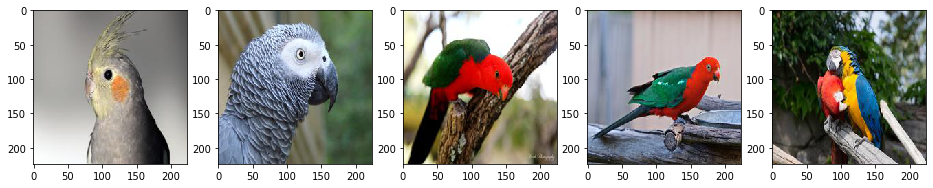

In [30]:
plt.figure(figsize=(16,8))
for i in range(5):
    # define subplot
    pyplot.subplot(1,5,i+1)
    x=parrot[i].astype('uint8')
    plt.imshow(x)

In [31]:
images=glob.glob('train/lion/*.jpg')
lion=[]
for image in images:
    with open(image,'rb') as file:
        img=Image.open(file)
        data=img_to_array(img)
        lion.append(data)

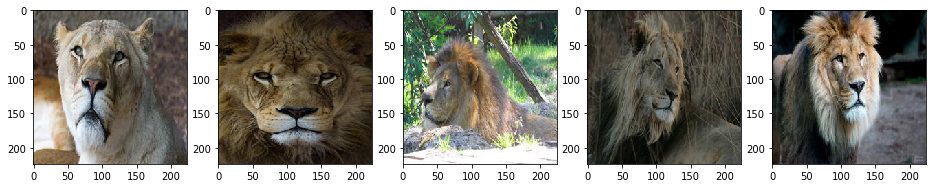

In [32]:
plt.figure(figsize=(16,8))
for i in range(5):
    # define subplot
    pyplot.subplot(1,5,i+1)
    x=lion[i].astype('uint8')
    plt.imshow(x)

In [33]:
images=glob.glob('train/horse/*.jpg')
horse=[]
for image in images:
    with open(image,'rb') as file:
        img=Image.open(file)
        data=img_to_array(img)
        horse.append(data)

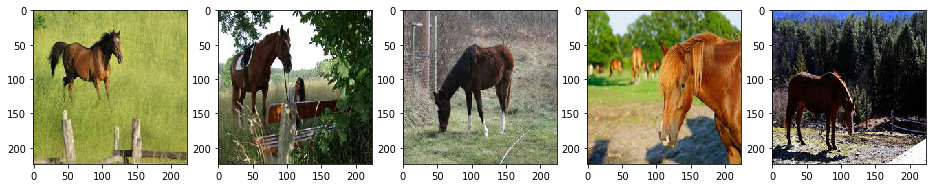

In [34]:
plt.figure(figsize=(16,8))
for i in range(5):
    # define subplot
    pyplot.subplot(1,5,i+1)
    x=horse[i].astype('uint8')
    plt.imshow(x)

<h4>Show how to add augmentation to your training data. Describe both the augmentation being applied, how it's done in the code, and show examples of the augmentation</h4>

<h4> Data Augmentation </h4><br>
    Many times we have to train a model with very few data samples and thus the training of model is not as good as we desire. Not only this, a small number of training data samples will also result in overfitting. This problem can be solved if we use Data Augmentation. Data Augmentation is a technique to increase the number of training data by doing certain manipulation to the data. Apart from this, we get different orientation of the same data sample which further helps in better training and classification. A few examples of Data Augmentation are Image Geometry Augmentation, Colour Augmentation, Binning, Patch Shuffle, Sample Pairing, etc. We will try to show example code for as many type of augmentations as possible along with a combination of different augmentations together. The codes will be followed by the image results which will make it very clear how Data Augmentation works. <br><br>
    We used ImageDataGenerator class to make augmentations in our image data. The following is a list of important arguments of this class:<br>
    <li>horizontal_flip: Boolean. Flips the image horizontally.
    <li>vertical_flip: Boolean. Flips the image vertically.
    <li>rotation_range: We can provide an angle between 0 to 180 degree and keras will randomly assign a rotation to the image.
    <li>zoom_range: Float value or Range[Upper,Lower].
    <li>dtype: Data type for the generated arrays.
    <li>brightness_range: Range[Upper, Lower].
    <li>shear_range:Float value. Shows the counter-clockwise shear in the image. Do not provide a high value to prevent more shear, i.e, weird images.
    <li>height_shift: Float, 1-D array, Int. We provide a ratio of the original height to shift the image upward or downward
    <li>width_shift: Float, 1-D array, Int. We provide a ratio of the original width to shift the image to right or left.
    <li>Rescale:Rescale is a value by which we will multiply the data before any other processing. Our original images consist in RGB coefficients in the 0-255, but such values would be too high for our model to process (given a typical learning rate), so we target values between 0 and 1 instead by scaling with a 1/255. It 

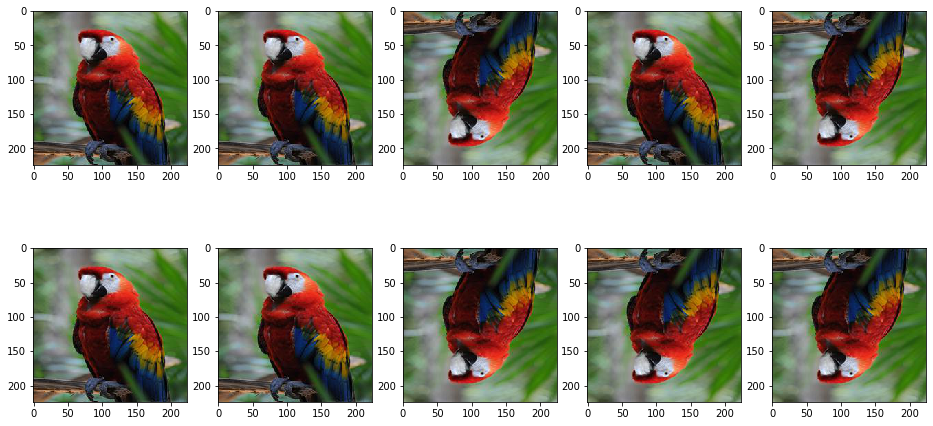

In [35]:
# example of Vertical Flip image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
img = load_img('images/1399.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(vertical_flip=True)
# prepare iterator
it = datagen.flow(samples, batch_size=8)
plt.figure(figsize=(16,8))
# generate samples and plot
for i in range(10):
    # define subplot
    pyplot.subplot(2,5,i+1)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

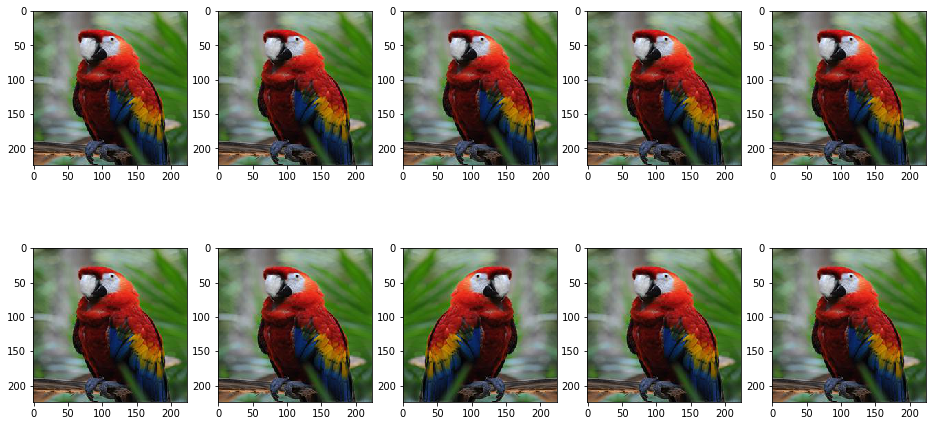

In [36]:
# example of horizontal shift image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
img = load_img('images/1399.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(horizontal_flip=True)
# prepare iterator
it = datagen.flow(samples, batch_size=8)
plt.figure(figsize=(16,8))
# generate samples and plot
for i in range(10):
    # define subplot
    pyplot.subplot(2,5,i+1)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

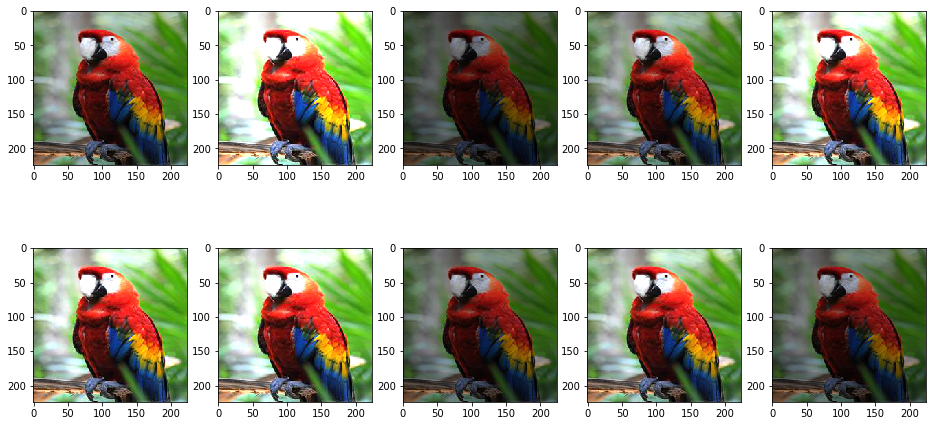

In [37]:
# example of Brightness image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
img = load_img('images/1399.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(brightness_range=(0.5,2.0))

# prepare iterator
it = datagen.flow(samples, batch_size=8)
plt.figure(figsize=(16,8))
# generate samples and plot
for i in range(10):
    # define subplot
    pyplot.subplot(2,5,i+1)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

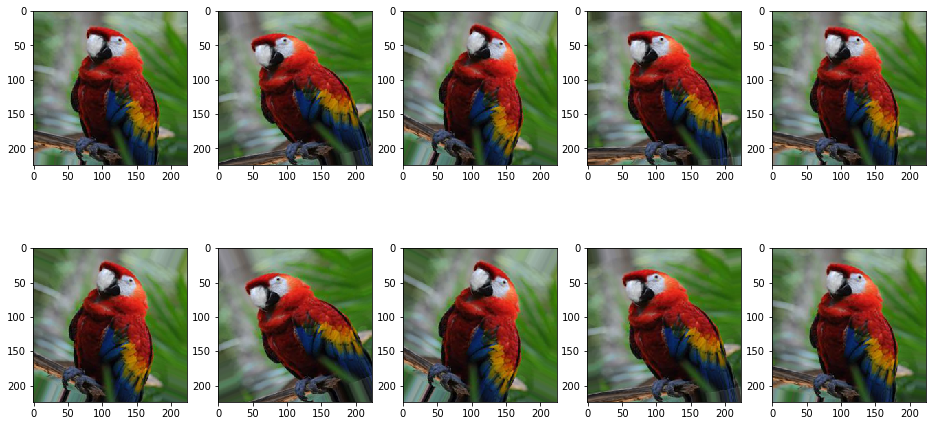

In [38]:
# example of Rotation image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
img = load_img('images/1399.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=30)

# prepare iterator
it = datagen.flow(samples, batch_size=8)
plt.figure(figsize=(16,8))
# generate samples and plot
for i in range(10):
    # define subplot
    pyplot.subplot(2,5,i+1)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

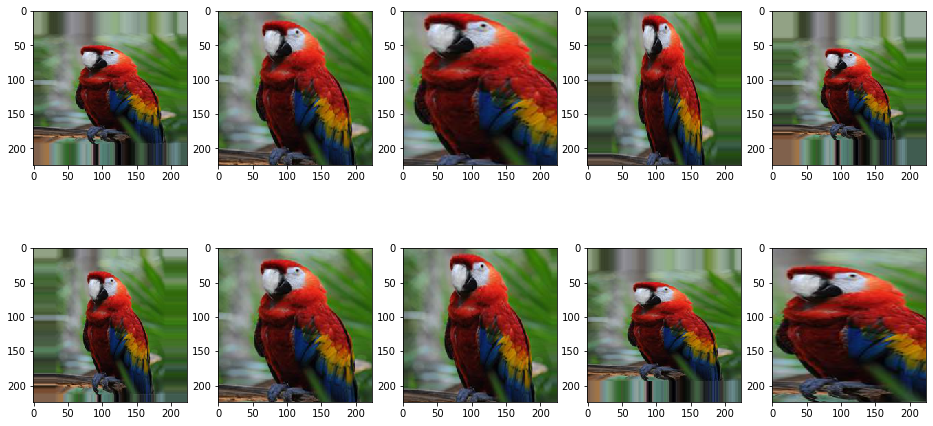

In [39]:
# example of Zoom augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
img = load_img('images/1399.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(zoom_range=0.5)

# prepare iterator
it = datagen.flow(samples, batch_size=8)
plt.figure(figsize=(16,8))
# generate samples and plot
for i in range(10):
    # define subplot
    pyplot.subplot(2,5,i+1)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

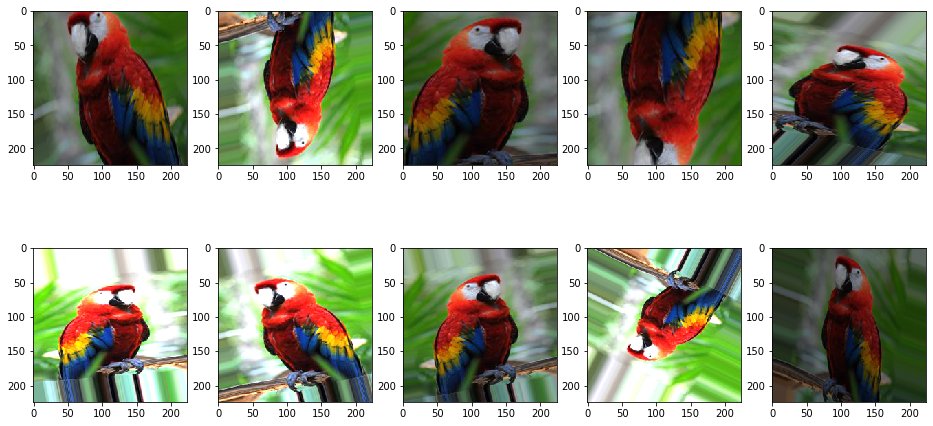

In [40]:
# example of all image augmentation together
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
img = load_img('images/1399.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
#datagen = ImageDataGenerator(width_shift_range=[-2,2])
datagen = ImageDataGenerator(zoom_range=0.5,rotation_range=30
                             ,brightness_range=(0.5,2.0)
                             ,horizontal_flip=True,
                            vertical_flip=True)
# prepare iterator
it = datagen.flow(samples, batch_size=8)
plt.figure(figsize=(16,8))
# generate samples and plot
for i in range(10):
    # define subplot
    pyplot.subplot(2,5,i+1)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

<h3>How to Generate Image from Local Disk using ImageDataGenerator</h3>
<br>
<li>We used ImageDataGenerator to load images from my local drive. First I decided different augementation of the images and then I used flow_from_directory functionfrom ImageDataGenerator to download images in hardrive. 
<li>The images should be placed nicely in folders, with different class image in different folders
<li>We created 3 folders-train, test & validation. Inside these folders, I created 3 folders for 3 classes and saved images of different classes there.
<li>Now we can directly use flow_from_directory to load images.
<li>This function also labels the data according to the folder name. 

In [42]:
#Use ImageDataGenerator for train_datagen for all types of Augmentation
train_datagen = ImageDataGenerator(
    rotation_range = 40,                  
    width_shift_range = 0.2,                  
    height_shift_range = 0.2,                  
    rescale = 1./255,                  
    shear_range = 0.2,                  
    zoom_range = 0.2,                     
    horizontal_flip = True)

#Use only rescale for validation_datagen and test_datagen
validation_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
#Generate Train Images
train_generator = train_datagen.flow_from_directory(
    'train', #load Images from Train Directory
    target_size=(128,128),
    class_mode='categorical', #3 Categorical classes
    batch_size = 128)
validation_generator = validation_datagen.flow_from_directory(
    'validation', #load Images from Validation Directory
    target_size=(128,128),
    class_mode='categorical', #3 categorical classes
    batch_size = 128)

test_generator = test_datagen.flow_from_directory(
    'test',     #load Images from Test Directory
    target_size=(128,128),
    class_mode='categorical', #3 categorical classes
    batch_size = 128)

Found 3181 images belonging to 3 classes.
Found 288 images belonging to 3 classes.
Found 508 images belonging to 3 classes.


<b>Transfer Learning: Show how to start with a pre-trained network architecture as the feature layers (featureizer), and alter that network to apply to your task (i.e., removing the output layers and adding your own). Experiment with at least two different feature layers (two different pre-trained networks). Compare them both in structure (show a diagram), talking about the relative complexity, number of parameters, etc., and also in the results you obtain.</b>

<h3>Transfer Learning Definition</h3>

Transfer learning is a machine learning method where a model developed for a task is reused as the starting point for a model on a second task.
<li>Instead of model from Scratch, we can select an appropriate pretrained modell</li>
<li>This pretrained model can be used to make predictions on our training data</li>
<li>We can also tune the pretrained model by retraining all of its layer/select layers with our training data</li>

Transfer learning is simply a process to utilize a previously trained model and use it for other purposes. This not only reduces the computational load, but it also saves a lot of time as it might take a very long time to train deep neural networks from scratch.<br>
<br>
But the process is not just putting a pre-trained network into a different classifier and run the model. A lot of factors depend upon how to use this pre-trained model and what changes are required. <br>
<li>If the classes are similar to the classes on which our pretrained model was trained and the dataset we have is small, we can simply use the pre-trained model without any change and add our pre-trained classifier to this model.
 <li> If the classes are somewhat similar and the dataset is large, we need to fine tune the predefined model a bit. Fine tuning is the process where we freeze the weights of the first few layers of the pre-trained model (as the features in these layers are very general) but train the layers after this using a very small learning rate (these layers are trained because these layers have more complex features of the class and are quite dependent on the different classes).
 <li> If the data samples are very different and the dataset is large, we need to train the pre-trained model from scratch.

In [43]:
%%html
<img src="images/TL.jpeg",width=500,height=100>

<h3>Important Layers in the Neural Networks we Use</h3></br>

<b>Dense Layer</b><br>
Dense Layer is the most commonly used neural net. A dense layer represents a matrix vector multiplication.  The values that is passed to the dense layerin matrix form are the trainable parameters which get updated during backpropagation.

<b>Convolutional Layer (conv2d_4)</b><br>
The convolutional neural networks are very similar to Dense Neural Nets, with the prominent difference that differential feature of the CNN is that they make the explicit assumption that the entries are images, which allows us to encode certain properties in the architecture to recognize specific elements in the images.<br>
This difference can be explained as- the dense layer learns global patterns in its global input space, while the convolutional layers learn local patterns in small windows of two dimensions.<br>
Convolutional layers can also remember features it previously encountered, while normal dense layers have to learn them again

<b>Max Pooling (MaxPool2D)</b><br>
Max Pooling is a dicretization method where the objective is to downsample an output from a layer (like Conv or dense layer).
The idea is to take downsample a matrix. For example, we have a 4x4 matrix and we need to downsample it in 2x2 form. Max Pooling will divide the 4x4 matrix in 4 2x2 matrix and take the max of each of the matrix to form a new 2x2 matrix.<br>
Max pooling helps in reducing dimension and improving computation efficiency

<b>GlobalAveragePooling (GlobalAveragePooling2D)</b><br>
Global Average Pooling does the same thing as Max pooling except of findig the max value, it just takes the average

<b>Flatten Layer</b><br>
Flattern layers remove all dimensions except 1 from its input

<b>Dropout Layer</b><br>

A dropout layer is used for regularization where we randomly select neurons to deactivate based on a probability p. This forces the neural network to understand and learn new patterns and not rely on old ones formed when all the nodes were densely connected. This also maked the neural network faster. Dropout happens only when training and not in evaluation

<b>Batch Normalization</b><br>

Batch normalization is a method we can use to normalize the inputs of each layer by using mean and variance.

<h3>VGG16 Model</h3>

We have selected VGG16 as our first pre-trained model to perform predictio on our custom dataset. Lets briefly go through what is VGG16 and its architecture

<h4>VGG16</h4><br>
VGG16 is named after the paper where it was first introduced “Very Deep Convolutional Networks for Large-Scale Image Recognition”. It is a convolutional neural network model proposed by K. Simonyan and A. Zisserman from the University of Oxford. The model achieves 92.7% top-5 test accuracy in ImageNet, which is a dataset of over 14 million images belonging to 1000 classes.
<br><br>
<b>ImageNet</b><br>
ImageNet is a dataset of over 15 million labeled high-resolution images belonging to roughly 22,000 categories. The database of annotations of third-party image URLs is freely available directly from ImageNet
<br><br>
<b>Architecture of VGG16</b>
<li>The input to VGG16's first layer layer is of fixed size 224 x 224 RGB image.</li>
<li>The image is passed through 2 Convolutional Layers at first followed by a MaxPooling2D layer</li>
<li>This happens a couple of times.</li>
<li>In VGG16 with output layers and feature prediction for 1000 classes, this happens 5 times</li>
<li> In the first 2 times, the image passes through 2 Convolutional Layer, followed by 1 MaxPooling2D Layer</li>
<li> In the last 3 times, the image passes through 3 Convolutional Layer, followed by 1 MaxPooling2D Layer</li>
<li> When we remove the output layers, only top 3 of these layer formation remain
        <li>2*(2 Conv Layer, 1 MaxPooling2D) and 1 (3 Conv Layer, 1 MaxPooling2D)</li>
        </li>
<li> This is because the bottom Convolutional Layers become too specific for the 1000 output layers it is supposed to predict and these layers won't be a good predictor for other classes</li>
<li> To achieve Transfer Learning, we can add custom layer after the VGG Layers, or we can learn feature from VGG and add it to our custom layers</li>

In [44]:
%%html
<img src="images/VGG16model.PNG",width=500,height=100>

In [45]:
#Importing vgg model with output layers
vgg_model = vgg.VGG16(weights='imagenet')
#Printing Summary
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

<h4>Our VGG16 Model</h4><br>
In this question, we could have taken 2 approaches-
<li>Run the images on the pretrained model with all the training layers frozen, then save the features. Then save these features and run the saved features on our custom model. We then fine-tune our models, like training some layers in VGG16 by unfreezing to improve performance.
<li> The second approach is to add custom layers aften the training layers of VGG16. The images will run through the frozen layers of VGG16 and then the features will directly be passed to the layers we crated. The features will be trained here and we will get a prediction. We then follow the same fine-tuning process, by unfreezing some VGG16 layers and checking if accuracy is improving</li>

We took the second approach.

<li>Our inputs consist of 128*128*3(RGB) images from three classes-Parrot, Lion & Horse</li>
<li>As explained above, our model consist of input layers from VGG16. This consists of sequence of Convolutional Layers followed by max pooling.
<li>After the last max pooling layer, we have added our own convolutional layer. This layer is for training our features, as all the training layers in VGG are frozen.
<li>After that we added global_average_pooling to reduce dimensionality, and then added batch_normalization layer to normalize
<li> We then added 1 dense layers to improve performance.
<li>Lastly we added a layer with softmax. This layer gives 3 outputs, which pertains to 3 output classes

In [46]:
%%html
<img src="images/VGG16.PNG",width=500,height=100>

In [47]:
%%html
<img src="images/Logo.PNG",width=500,height=100>

In [48]:
#VGG Model taken without the Output Layers and setting inputs as our image size
vgg_model = vgg.VGG16(weights='imagenet', include_top=False,input_shape=(128, 128, 3))

In [49]:
#Freezing all Training Layers in VGG16 Model
for layer in vgg_model.layers:
     layer.trainable = False

In [50]:
#Adding Our Layers to VGG16 Model. These layers are trainable
last = vgg_model.get_layer('block3_pool').output #The last layer of VGG16 
# Add classification layers on top of it
x =Conv2D(filters=128,kernel_size=(2,2),activation='relu')(last) #Adding Conv2D after the last VGG layer
x = GlobalAveragePooling2D()(x) #Adding General Average Pooling layer
x= BatchNormalization()(x) #Adding Batch Normalization Layer
x = Dense(128, activation='relu')(x) #Adding Dense Layer
x = Dropout(0.6)(x) #Adding Dense Layer
pred = Dense(3, activation='softmax')(x)  #Creating an Output layer
vgg_model = Model(vgg_model.input, pred) #Combining the output with the VGG Model

In [51]:
#The summary of the new VGG16 model
vgg_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0   

In [52]:
#We selected a suitable learning rate so that the weights are updated properly
#As our data is Categorical, we selected categorical_crossentropy as loss function
#We have explained about optimizer Adam in a previous assignent
LEARNING_RATE = 1e-4
vgg_model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=LEARNING_RATE),
              metrics=['accuracy'])

In [53]:
import time
IMG_SIZE = 128
NB_CHANNELS = 3# 3 for RGB images or 1 for grayscale images
BATCH_SIZE = 128
NB_TRAIN_IMG = 3508 # Total Training Images
NB_VALID_IMG = 469 #Total Validation Images. We took it a bit higher to increase validation steps

In [74]:
#cnn.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
start = time.time()
#Fit fit_generator is used when either we have a huge dataset to fit into our memory 
#or when data augmentation needs to be applied.
history=vgg_model.fit_generator(
    train_generator,  #Getting Train Data using the function train_generator defined
    steps_per_epoch=NB_TRAIN_IMG//BATCH_SIZE, #Number of Steps per Epoch
    epochs=10,
    validation_data=validation_generator, #Getting Validation Data using the function train_generator defined
    validation_steps=NB_VALID_IMG//BATCH_SIZE)
end = time.time()
print('Processing time:',(end - start)/60) #Finding the time taken to run the code
vgg_model.save_weights('vgg_model_baseline.h5') #Save the weights for future purposes

Epoch 1/10
27/27 [==============================] - 236s 9s/step - loss: 1.1915 - accuracy: 0.5263 - val_loss: 2.5685 - val_accuracy: 0.6319
Epoch 2/10
27/27 [==============================] - 232s 9s/step - loss: 0.7930 - accuracy: 0.6671 - val_loss: 0.8571 - val_accuracy: 0.6528
Epoch 3/10
27/27 [==============================] - 268s 10s/step - loss: 0.6774 - accuracy: 0.7190 - val_loss: 0.8248 - val_accuracy: 0.7882
Epoch 4/10
27/27 [==============================] - 267s 10s/step - loss: 0.5592 - accuracy: 0.7739 - val_loss: 0.2367 - val_accuracy: 0.8958
Epoch 5/10
27/27 [==============================] - 274s 10s/step - loss: 0.5167 - accuracy: 0.7917 - val_loss: 0.2933 - val_accuracy: 0.8611
Epoch 6/10
27/27 [==============================] - 274s 10s/step - loss: 0.4858 - accuracy: 0.8033 - val_loss: 0.2939 - val_accuracy: 0.8750
Epoch 7/10
27/27 [==============================] - 253s 9s/step - loss: 0.4456 - accuracy: 0.8312 - val_loss: 0.3136 - val_accuracy: 0.8681
Epoch 8/1

In [75]:
#Evaluating our Fit model
test_loss,test_acc=vgg_model.evaluate(train_generator,verbose=1)
test_acc

25/25 [==============================] - 265s 11s/step


0.8663942217826843

In [78]:
#Printing Test Accuracy
test_acc

0.8663942217826843

In [79]:
#Printing Test Loss
test_loss

0.31742820143699646

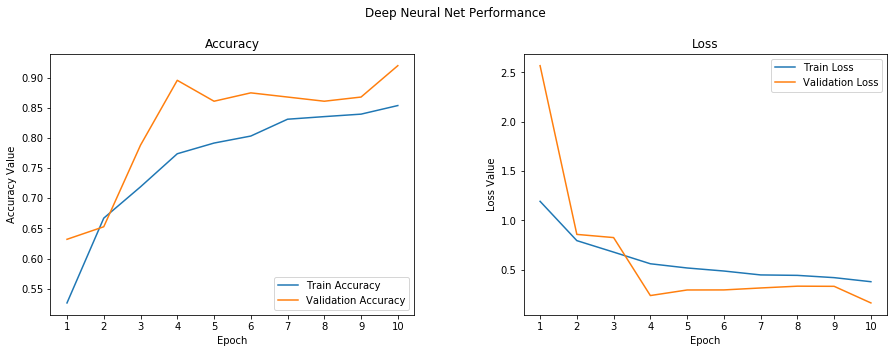

In [80]:
#The code below is use to find the Train and Validation Accuracy in each Epoch
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
t = f.suptitle('Deep Neural Net Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)
epochs = list(range(1,10+1))
ax1.plot(epochs, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(epochs)
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")
ax2.plot(epochs, history.history['loss'], label='Train Loss')
ax2.plot(epochs, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(epochs)
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

<h4>Fine Tuning VGG16</h4>

<li>As explained above, we are trying to improve our performance by unfreezing and training some layers in the VGG16 model.
<li>We are taking the same VGG16 as vgg_model_v2 this time.
<li>We have trained the last sequence of Convolutional layer with our training data by unfreezing the last 3 Conv layers and the max pooling layer
<li>These layers were selected as these were the last layers of VGG output model and hence most specific. The new weight calculation could in theory better specific performance to our output classes

In [54]:
#Taking the same vgg model with a new name vgg_model_v2
vgg_model_v2=vgg.VGG16(weights='imagenet', include_top=False,input_shape=(128, 128, 3))

In [55]:
#Freezing all VGG16 layers and then unfreezing the last 4 layers (3 Conv, 1 Max-pooling)
for layer in vgg_model_v2.layers:
    if (layer.name=='block3_conv1'):
        layer.trainable = True
    elif (layer.name=='block3_conv2'):
        layer.trainable = True
    elif (layer.name=='block3_conv3'):
        layer.trainable = True
    elif (layer.name=='block3_pool'):
        layer.trainable = True
    else:
        layer.trainable=False

In [56]:
#Adding the same layers as the original model
last = vgg_model_v2.get_layer('block3_pool').output
x = GlobalAveragePooling2D()(last)
x= BatchNormalization()(x)
x = Dropout(0.6)(x)
pred = Dense(3, activation='softmax')(x)
vgg_model_v2 = Model(vgg_model_v2.input, pred)

In [57]:
#Checking to see which models are trainable
for l in vgg_model_v2.layers:
    print(l.name, l.trainable)

input_5 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 True
block3_conv2 True
block3_conv3 True
block3_pool True
global_average_pooling2d_3 True
batch_normalization_3 True
dropout_3 True
dense_5 True


In [58]:
#Summary of the V2 model. Same as the original VGG16 modol
vgg_model_v2.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0   

In [59]:
#Same as the original model
LEARNING_RATE = 1e-4
vgg_model_v2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=LEARNING_RATE),
              metrics=['accuracy'])

In [60]:
import time
IMG_SIZE = 128
NB_CHANNELS = 3# 3 for RGB images or 1 for grayscale images
BATCH_SIZE = 128
NB_TRAIN_IMG = 3508 # Total Training Images
NB_VALID_IMG = 469 #Total Validation Images. We took it a bit higher to increase validation steps

In [87]:
#Training the model as before
start = time.time()
history=vgg_model_v2.fit_generator(
    train_generator,
    steps_per_epoch=NB_TRAIN_IMG//BATCH_SIZE,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=NB_VALID_IMG//BATCH_SIZE)
end = time.time()
print('Processing time:',(end - start)/60)
vgg_model_v2.save_weights('vgg_model_v2.h5')

Epoch 1/10
27/27 [==============================] - 482s 18s/step - loss: 1.0359 - accuracy: 0.6503 - val_loss: 3.8048 - val_accuracy: 0.6250
Epoch 2/10
27/27 [==============================] - 468s 17s/step - loss: 0.5705 - accuracy: 0.7990 - val_loss: 3.9869 - val_accuracy: 0.3924
Epoch 3/10
27/27 [==============================] - 437s 16s/step - loss: 0.4463 - accuracy: 0.8353 - val_loss: 2.1949 - val_accuracy: 0.6181
Epoch 4/10
27/27 [==============================] - 431s 16s/step - loss: 0.3600 - accuracy: 0.8733 - val_loss: 0.4505 - val_accuracy: 0.8542
Epoch 5/10
27/27 [==============================] - 446s 17s/step - loss: 0.3220 - accuracy: 0.8800 - val_loss: 0.2950 - val_accuracy: 0.8819
Epoch 6/10
27/27 [==============================] - 449s 17s/step - loss: 0.2823 - accuracy: 0.8958 - val_loss: 0.1595 - val_accuracy: 0.9306
Epoch 7/10
27/27 [==============================] - 432s 16s/step - loss: 0.2351 - accuracy: 0.9117 - val_loss: 0.0866 - val_accuracy: 0.9757
Epoch 

In [88]:
#Finding the loss and accuracy 
test_loss,test_acc=vgg_model_v2.evaluate(train_generator,verbose=1)
test_acc

25/25 [==============================] - 202s 8s/step


0.7469349503517151

In [89]:
#Finding the loss of the function
test_loss

0.5385969281196594

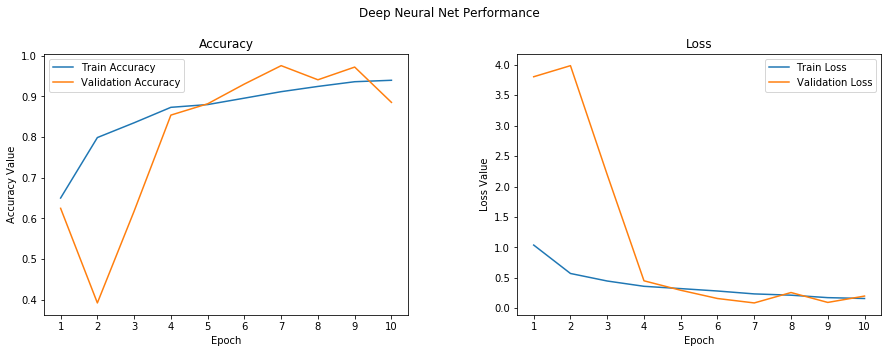

In [90]:
#Plotting Train Accuracy and Validation Accuracy in each Epoch
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
t = f.suptitle('Deep Neural Net Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)
epochs = list(range(1,10+1))
ax1.plot(epochs, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(epochs)
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")
ax2.plot(epochs, history.history['loss'], label='Train Loss')
ax2.plot(epochs, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(epochs)
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

<h4>CONCLUSION</h4>
<li>VGG16 is a complex and computationally heavy model. Our models took 40-45 minutes to run. 
<li>We get approximately 87% accuracy without training the vgg layer (i.e We extracted the features from vgg and trained our classifier. In our project, this was done by combining the vgg model (all layers frozen) and our classifier, such that we were just extracting the features from vgg and only our classifier was allowed to train).
<li>And approximately 75% accuracy by fine tuning last few layers of vgg. (i.e, a few layers of the vgg was also trained along with the classifier at a very small learning rate). <br>
<br>
The results obtained are not satisfactory(considering a deep network used). This might be because the training layers are overfitting for the training data

<h3>MOBILENET MODEL</h3>

<li>The second pretrained model we selected was Mobilenet Model
<li>MobileNets are a class of convolutional neural network designed by researches at Google.
<li>MobileNets support any input size greater than 32 x 32, with larger image sizes offering better performance.
<li>The main difference between the MobileNet architecture and a traditional CNN is instead of a single 3x3 convolution layer followed by batch norm and ReLU, MobileNets split the convolution into a 3x3 depthwise conv and a 1x1 pointwise conv.
    

In [61]:
%%html
<img src="images/mobilenet.PNG",width=500,height=100>

In [62]:
#Importing MobileNet from Keras with the Output Layers
from keras.applications import MobileNet
mobile_model=MobileNet(weights='imagenet')
mobile_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

<b>Using ImageNet as Pretrained Model</b>

When we take out the Output layers of Mobilenet, following output layers are removed-
<li>global_average_pooling2d_12
<li>reshape_1
<li>dropout
<li>conv_preds
<li>reshape_2
<li>act_softmax

<li>Our inputs consist of 128*128*3(RGB) images from three classes-Parrot, Lion & Horse</li>
<li>After the conv_pw_13_relu (last layer of Mobilenet Model), we have added our own convolutional layer. This layer is for training our features, as all the training layers in MobileNet are frozen.
<li>After that we added global_average_pooling to reduce dimensionality, and then added batch_normalization layer to normalize
<li> We then added 1 dense layers to improve performance.
<li>Lastly we added a layer with softmax. This layer gives 3 outputs, which pertains to 3 output classes

In [63]:
%%html
<img src="images/mymobilenet.PNG",width=500,height=100>

In [64]:
#Importing MobileNet from Keras
mobile_model = MobileNet(weights='imagenet',include_top=False, input_shape=(128, 128, 3))

In [65]:
#Freezing the MobileNet Layers
for layer in mobile_model.layers:
    layer.trainable = False

In [66]:
#Adding Our Layers to MobileNet Model. These layers are trainable
last = mobile_model.get_layer('conv_pw_13_relu').output #The last layer of VGG16 
# Add classification layers on top of it
x =Conv2D(filters=128,kernel_size=(2,2),activation='relu')(last)#Adding Conv2D after the last VGG layer
x = GlobalAveragePooling2D()(x) #Adding General Average Pooling layer
x= BatchNormalization()(x) #Adding Batch Normalization Layer
x = Dense(128, activation='relu')(x) #Adding Dense Layer
x = Dropout(0.6)(x)
pred = Dense(3, activation='softmax')(x) #Creating an Output layer
mobile_model = Model(mobile_model.input, pred)  #Combining the output with the VGG Model

In [173]:
#Printing the summary of MobileNet Model
mobile_model.summary()

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        (None, 128, 128, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 129, 129, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 64, 64, 32)        128

In [67]:
#Setting an Appropriate Learning Rate
LEARNING_RATE = 1e-4
#Compiling the Model
mobile_model.compile(loss='categorical_crossentropy', #categorical_crossentropy because multiple class
              optimizer=optimizers.Adam(lr=LEARNING_RATE),
              metrics=['accuracy'])

In [68]:
import time
IMG_SIZE = 128
NB_CHANNELS = 3# 3 for RGB images or 1 for grayscale images
BATCH_SIZE = 128
NB_TRAIN_IMG = 3508 # Total Training Images
NB_VALID_IMG = 469 #Total Validation Images. We took it a bit higher to increase validation steps

In [123]:
start = time.time()
#Fit fit_generator is used when either we have a huge dataset to fit into our memory
#or when data augmentation needs to be applied.
history=mobile_model.fit_generator(
    train_generator, #Getting Train Data using the function train_generator defined
    steps_per_epoch=NB_TRAIN_IMG//BATCH_SIZE, #Number of Steps per Epoch
    epochs=5,
    validation_data=validation_generator, #Getting Validation Data using the function train_generator defined
    validation_steps=NB_VALID_IMG//BATCH_SIZE)
end = time.time()
print('Processing time:',(end - start)/60) #Finding the time taken to run the code
mobile_model.save_weights('mobile_model.h5') #Save the weights for future purposes

Epoch 1/5
27/27 [==============================] - 111s 4s/step - loss: 0.7724 - accuracy: 0.6669 - val_loss: 0.1698 - val_accuracy: 0.9826
Epoch 2/5
27/27 [==============================] - 172s 6s/step - loss: 0.2474 - accuracy: 0.9089 - val_loss: 0.0376 - val_accuracy: 0.9931
Epoch 3/5
27/27 [==============================] - 188s 7s/step - loss: 0.1563 - accuracy: 0.9491 - val_loss: 0.0367 - val_accuracy: 0.9965
Epoch 4/5
27/27 [==============================] - 188s 7s/step - loss: 0.1137 - accuracy: 0.9643 - val_loss: 0.0093 - val_accuracy: 0.9965
Epoch 5/5
27/27 [==============================] - 191s 7s/step - loss: 0.0826 - accuracy: 0.9769 - val_loss: 0.0016 - val_accuracy: 1.0000
Processing time: 14.33380593061447


In [124]:
#Evaluating the model on test data
test_loss,test_acc=test_loss,test_acc=mobile_model.evaluate(train_generator,verbose=1)
test_acc

25/25 [==============================] - 155s 6s/step


0.9883684515953064

In [125]:
#Printing Test Loss
test_loss

0.030104637145996094

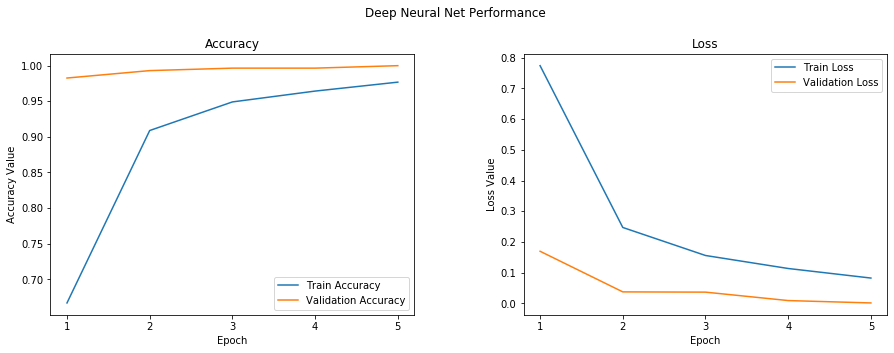

In [126]:
#Plotting Train Accuracy and Validation Accuracy in each Epoch
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
t = f.suptitle('Deep Neural Net Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)
epochs = list(range(1,5+1))
ax1.plot(epochs, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(epochs)
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")
ax2.plot(epochs, history.history['loss'], label='Train Loss')
ax2.plot(epochs, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(epochs)
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

<h4>Fine Tuning Mobile Model Layers</h4>

As explained above, we are trying to improve our performance by unfreezing and training some layers in the MobileNet model.
We are taking the same MobileNet as mobile_model_v2 this time.
We kept the last 8 Convolutional layer in the Mobile Model as trainable, and we hope that this will fine tune the final model

In [69]:
mobile_model_v2=MobileNet(weights='imagenet',include_top=False, input_shape=(128, 128, 3))

In [70]:
#Keeping the last 8 COnvolutional Layer as trainable
for layer in mobile_model_v2.layers:
    if (layer.name=='conv_dw_13'):
        layer.trainable = True
    elif (layer.name=='conv_dw_13_bn'):
        layer.trainable = True
    elif (layer.name=='conv_dw_13_relu'):
        layer.trainable = True
    elif (layer.name=='conv_pw_13'):
        layer.trainable = True
    elif (layer.name=='conv_pw_13_bn'):
        layer.trainable = True
    elif (layer.name=='conv_pw_13_relu'):
        layer.trainable = True
    elif (layer.name=='conv_dw_13_relu'):
        layer.trainable = True
    elif(layer.name=='conv2d_3'):
        layer.trainable = True
    else:
        layer.trainable=False

In [71]:
#Printing all the layers to check which layers are not frozen
for l in mobile_model_v2.layers:
    print(l.name, l.trainable)

input_8 False
conv1_pad False
conv1 False
conv1_bn False
conv1_relu False
conv_dw_1 False
conv_dw_1_bn False
conv_dw_1_relu False
conv_pw_1 False
conv_pw_1_bn False
conv_pw_1_relu False
conv_pad_2 False
conv_dw_2 False
conv_dw_2_bn False
conv_dw_2_relu False
conv_pw_2 False
conv_pw_2_bn False
conv_pw_2_relu False
conv_dw_3 False
conv_dw_3_bn False
conv_dw_3_relu False
conv_pw_3 False
conv_pw_3_bn False
conv_pw_3_relu False
conv_pad_4 False
conv_dw_4 False
conv_dw_4_bn False
conv_dw_4_relu False
conv_pw_4 False
conv_pw_4_bn False
conv_pw_4_relu False
conv_dw_5 False
conv_dw_5_bn False
conv_dw_5_relu False
conv_pw_5 False
conv_pw_5_bn False
conv_pw_5_relu False
conv_pad_6 False
conv_dw_6 False
conv_dw_6_bn False
conv_dw_6_relu False
conv_pw_6 False
conv_pw_6_bn False
conv_pw_6_relu False
conv_dw_7 False
conv_dw_7_bn False
conv_dw_7_relu False
conv_pw_7 False
conv_pw_7_bn False
conv_pw_7_relu False
conv_dw_8 False
conv_dw_8_bn False
conv_dw_8_relu False
conv_pw_8 False
conv_pw_8_bn False


In [72]:
#Same Layers added as the MobileNet model with freezing
last = mobile_model_v2.get_layer('conv_pw_13_relu').output
# Add classification layers on top of it
x =Conv2D(filters=128,kernel_size=(2,2),activation='relu')(last)
x = GlobalAveragePooling2D()(x)
x= BatchNormalization()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.6)(x)
pred = Dense(3, activation='softmax')(x)
mobile_model_v2 = Model(mobile_model_v2.input, pred)

In [73]:
#Appropriate Learning Rate
LEARNING_RATE = 1e-4
mobile_model_v2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=LEARNING_RATE),
              metrics=['accuracy'])

In [74]:
import time
IMG_SIZE = 128
NB_CHANNELS = 3# 3 for RGB images or 1 for grayscale images
BATCH_SIZE = 128
NB_TRAIN_IMG = 3508 # Total Training Images
NB_VALID_IMG = 469 #Total Validation Images. We took it a bit higher to increase validation steps

In [130]:
#Same as the Original MobileNet Dataset
start = time.time()
history=mobile_model_v2.fit_generator(
    train_generator,
    steps_per_epoch=NB_TRAIN_IMG//BATCH_SIZE,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=NB_VALID_IMG//BATCH_SIZE)
end = time.time()
print('Processing time:',(end - start)/60)
mobile_model_v2.save_weights('mobile_model_v2.h5')

Epoch 1/5
27/27 [==============================] - 237s 9s/step - loss: 0.5544 - accuracy: 0.7818 - val_loss: 0.0106 - val_accuracy: 0.9965
Epoch 2/5
27/27 [==============================] - 217s 8s/step - loss: 0.1237 - accuracy: 0.9616 - val_loss: 9.6117e-04 - val_accuracy: 0.9965
Epoch 3/5
27/27 [==============================] - 216s 8s/step - loss: 0.0719 - accuracy: 0.9789 - val_loss: 9.7091e-04 - val_accuracy: 0.9965
Epoch 4/5
27/27 [==============================] - 224s 8s/step - loss: 0.0574 - accuracy: 0.9829 - val_loss: 0.0249 - val_accuracy: 1.0000
Epoch 5/5
27/27 [==============================] - 230s 9s/step - loss: 0.0561 - accuracy: 0.9825 - val_loss: 8.3596e-04 - val_accuracy: 0.9965
Processing time: 19.391806038220725


In [131]:
#Evaluating the model with the unfrozen layers and printing accuracy
test_loss,test_acc=mobile_model_v2.evaluate(train_generator,verbose=1)
test_acc

25/25 [==============================] - 175s 7s/step


0.9933983087539673

In [132]:
#Printing Loss
test_loss

0.0149463452398777

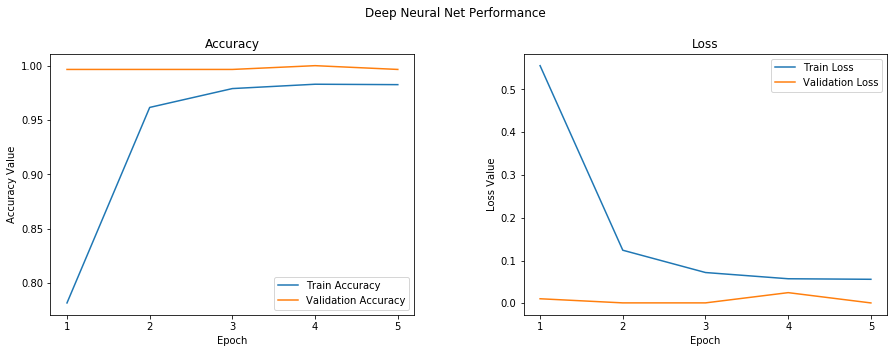

In [133]:
#Plotting Train Accuracy and Validation Accuracy in each Epoch
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
t = f.suptitle('Deep Neural Net Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)
epochs = list(range(1,5+1))
ax1.plot(epochs, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(epochs)
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")
ax2.plot(epochs, history.history['loss'], label='Train Loss')
ax2.plot(epochs, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(epochs)
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

<h4>Conclusion:</h4> 
<li> Mobile Net model was very fast in comparison to vgg16 model.
<li> We get approximately 98.8% accuracy without training the MobileNet model (i.e We extracted the features from ModelNet and trained our classifier. In our project, this was done by combining the ModelNet model (all layers frozen) and our classifier, such that we were just extracting the features from ModelNet and only our classifier was allowed to train).
<li>And approximately 99.34% accuracy by fine tuning last few layers of ModelNet. (i.e, a few layers of the ModelNet was also trained along with the classifier at a very small learning rate). <br>
<li>Unlike VGG16, finetuning works in MobileNet
The results obtained are quite satisfactory.

<h4> Comparison between VGG16 and MobileNet Models:</h4>

In [77]:
%%html
<img src="images\Vgg16.PNG",width=100,height=50>

In [81]:
%%html
<img src="images\LOGO.PNG",width=100,height=50>

In [79]:
%%html
<img src="images\mymobilenet.PNG",width=100,height=50>

<h4> Comparison between Vgg16 & MobileNet models:</h4>
<li>Structure wise: Vgg16 model has 12 convolutional layers. Convolutional Layers are followed by Maxpool layers that tries to reduce the dimensions. These layers are computationally very heavy. Though the number of layers in Mobilenet is higher, teey are computationally simpler, as Google has optimized it so that it can run on mobile devices.
<li> Computationally: We can see from our project that MobileNet is computationally less demanding than Vgg16 model and also it is much faster when comapared to Vgg16 model.
<li> Accuracy: The accuracy obtained by using MobileNet was much better than that by using Vgg16. In MobileNet model we got more than 99% accuracy in comparison to the 74% accuracy of Vgg16 model. Finetuning also proved beneficial in Mobile Net. Whe n sme layers of MobileNet was trained, the accuracy improved, while accuracy decreased in the VGG16 Model
<br> <br>    
 Considering all the above aspects, we believe MobileNet model to be a better choice (at least for our dataset).